<a href="https://colab.research.google.com/github/mansi2606/Cab-Booking-System/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [72]:
url= 'https://raw.githubusercontent.com/mansi2606/Cab-Booking-System/main/train.csv'
train=pd.read_csv(url)
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [73]:
url_label='https://raw.githubusercontent.com/mansi2606/Cab-Booking-System/main/train_label.csv'
train_label=pd.read_csv(url_label)
train_label.head()
train_label.shape

(8707, 1)

In [74]:
train.isnull().sum()
train_label.isnull().sum()
train.shape
train['Total_Booking']=train_label
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5.0
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,139.0
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,209.0
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,184.0
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,791.0


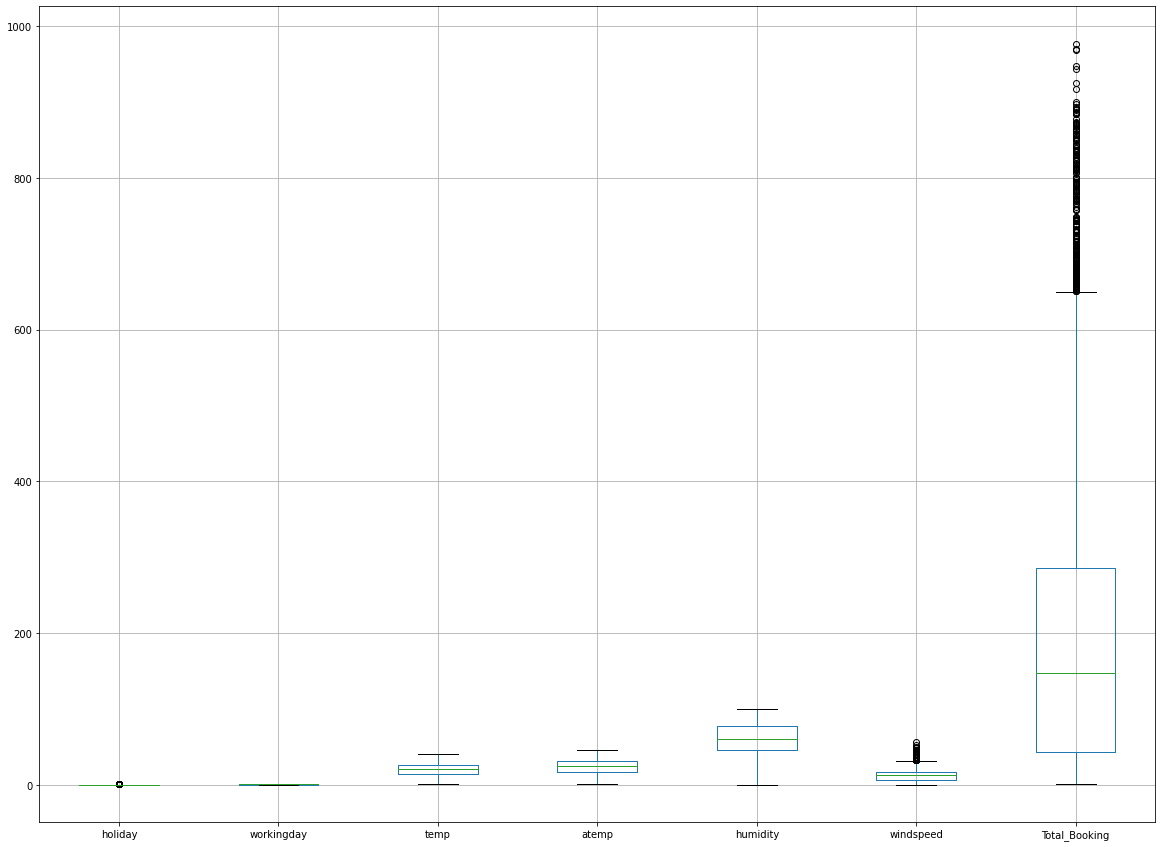

In [75]:
train.season.unique()
train.boxplot(figsize=(20,15))
 

# train['Total_Booking'].hist(bins=100,figsize=(10,15))
# plt.yticks(np.arange(0, 1000, step=20))
# plt.show()

# train['Total_Booking']>500

In [76]:
train['Total_Booking'][train['Total_Booking']>520].count()

568

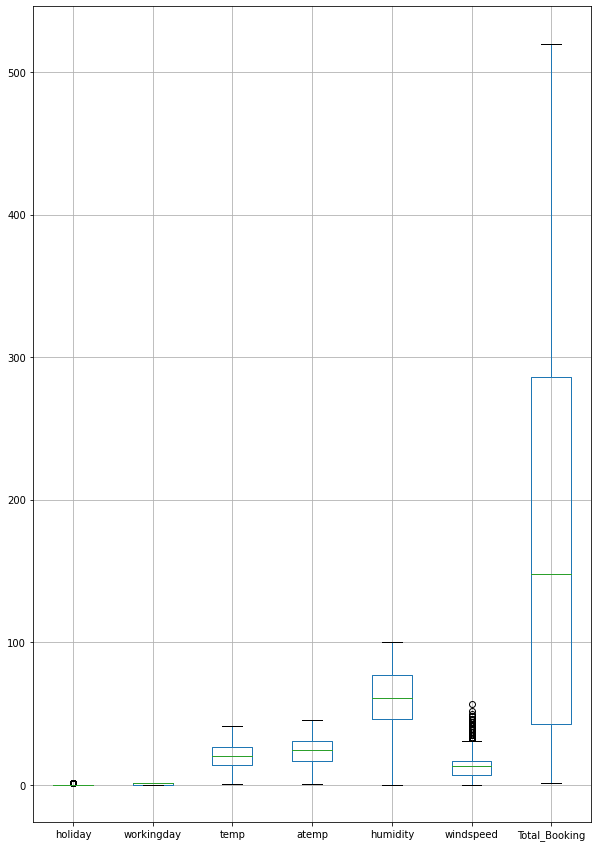

In [77]:
train['Total_Booking']=np.clip(train['Total_Booking'],0,520)
train.boxplot(figsize=(10,15))

In [65]:
# train['windspeed'].hist(bins=100,figsize=(10,15))
# plt.yticks(np.arange(0, 1000, step=20))
# plt.show()
# train['windspeed']=np.clip(train['windspeed'],0,980)
# train.boxplot(figsize=(10,15))

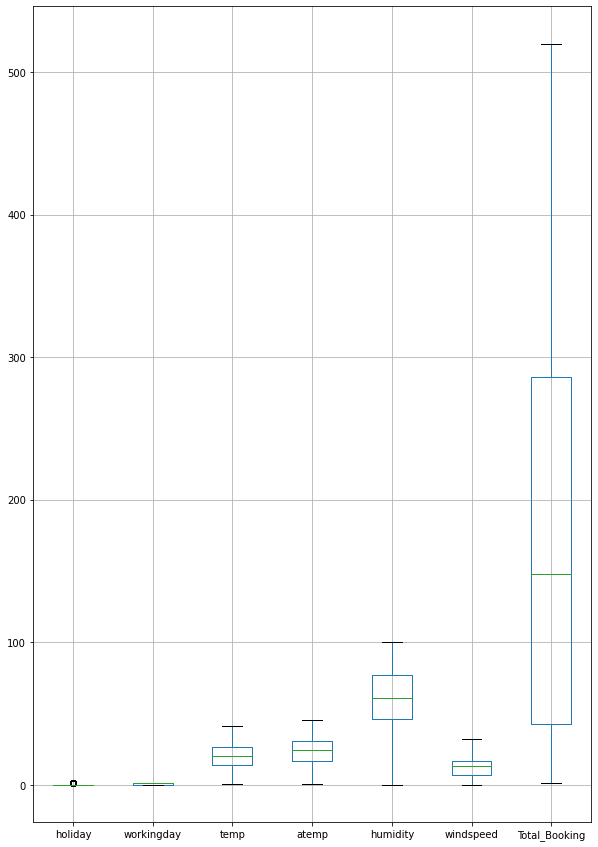

In [78]:
q1=train['windspeed'].quantile(0.25)
q3=train['windspeed'].quantile(0.75)
iqr=q3-q1
train['windspeed']=np.clip(train['windspeed'],0,1.5*iqr+q3)
train.boxplot(figsize=(10,15))

In [93]:
train.dtypes
train['datetime']=pd.to_datetime(train['datetime'])
train.dtypes
train['time']=train.datetime.dt.time
train['month']=train.datetime.dt.month_name()
train['day']=train.datetime.dt.day_name()
train['year']=train.datetime.dt.year
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,time,month,day,year
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5.0,19:00:00,May,Wednesday,2012
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,139.0,04:00:00,September,Wednesday,2012
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,209.0,09:00:00,January,Thursday,2011
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,184.0,16:00:00,November,Friday,2011
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,520.0,13:00:00,September,Tuesday,2011
